<a href="https://colab.research.google.com/github/wlgus3/python-apartment-linear-regression-project/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EC%A0%9D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###데이터 전처리

In [ ]:
file1 = '/content/drive/MyDrive/Colab Notebooks/22-2파이썬기반빅데이터 프로젝트/덕양구수정.csv'

In [ ]:
#pandas read_csv로 불러오기
import pandas as pd
mainD = pd.read_csv(file1, encoding='cp949',sep=',')

mainD.head()


,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명,거래유형
0,경기도 고양덕양구 고양동,454,454,0,고양동우방유쉘아파트,59.99,202204,"31,200",2,2007,읍내로 25,중개거래
1,경기도 고양덕양구 고양동,454,454,0,고양동우방유쉘아파트,84.93,202204,"43,300",14,2007,읍내로 25,중개거래
2,경기도 고양덕양구 고양동,454,454,0,고양동우방유쉘아파트,84.93,202204,"43,300",14,2007,읍내로 25,중개거래
3,경기도 고양덕양구 고양동,454,454,0,고양동우방유쉘아파트,59.99,202204,"30,500",3,2007,읍내로 25,중개거래
4,경기도 고양덕양구 고양동,454,454,0,고양동우방유쉘아파트,59.89,202205,"30,500",17,2007,읍내로 25,중개거래


In [ ]:
file2 = '/content/drive/MyDrive/Colab Notebooks/22-2파이썬기반빅데이터 프로젝트/경기도 고양시_공동주택현황_20210906.csv'

In [ ]:
df= mainD[mainD['계약년월']>=202207]
df.head

<bound method NDFrame.head of                시군구     번지   본번  부번         단지명   전용면적(㎡)    계약년월 거래금액(만원)   층  \
5    경기도 고양덕양구 고양동    454  454   0  고양동우방유쉘아파트   59.8900  202207   29,700   4   
7    경기도 고양덕양구 고양동    197  197   0          삼성   84.9960  202209   29,000  22   
14   경기도 고양덕양구 고양동  414-1  414   1       윤창APT   84.9600  202207   26,800  17   
15   경기도 고양덕양구 고양동  414-1  414   1       윤창APT   58.9875  202207   17,000   6   
16   경기도 고양덕양구 고양동  414-1  414   1       윤창APT   84.9600  202209   25,700  11   
..             ...    ...  ...  ..         ...       ...     ...      ...  ..   
649  경기도 고양덕양구 화정동    961  961   0    은빛마을11단지   60.0000  202207   45,000   3   
650  경기도 고양덕양구 화정동    961  961   0    은빛마을11단지   60.0000  202207   49,500   9   
653  경기도 고양덕양구 화정동    936  936   0     은빛마을6단지  164.3400  202208  108,000  15   
656  경기도 고양덕양구 화정동    870  870   0   은빛삼익주택(5)  101.3500  202208   57,000   6   
657  경기도 고양덕양구 화정동  965-1  965   1      한화꿈에그린  132.8900  202207   82,000  10  

In [ ]:
df.to_csv("덕양구789.csv",mode='w',index=False)

이상거래 제외

In [ ]:
df.loc[df['거래유형']=='중개거래','거래유형']=0
df

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명,거래유형
5,경기도 고양덕양구 고양동,454,454,0,고양동우방유쉘아파트,59.8900,202207,"29,700",4,2007,읍내로 25,0
7,경기도 고양덕양구 고양동,197,197,0,삼성,84.9960,202209,"29,000",22,1998,혜음로 30,0
14,경기도 고양덕양구 고양동,414-1,414,1,윤창APT,84.9600,202207,"26,800",17,1997,동헌로 398-17,0
15,경기도 고양덕양구 고양동,414-1,414,1,윤창APT,58.9875,202207,"17,000",6,1997,동헌로 398-17,0
16,경기도 고양덕양구 고양동,414-1,414,1,윤창APT,84.9600,202209,"25,700",11,1997,동헌로 398-17,0
...,...,...,...,...,...,...,...,...,...,...,...,...
649,경기도 고양덕양구 화정동,961,961,0,은빛마을11단지,60.0000,202207,"45,000",3,1996,백양로 126,0
650,경기도 고양덕양구 화정동,961,961,0,은빛마을11단지,60.0000,202207,"49,500",9,1996,백양로 126,0
653,경기도 고양덕양구 화정동,936,936,0,은빛마을6단지,164.3400,202208,"108,000",15,1996,화정로 27,0
656,경기도 고양덕양구 화정동,870,870,0,은빛삼익주택(5),101.3500,202208,"57,000",6,1995,화중로 164,0


In [ ]:
df.loc[df['거래유형']=='직거래','거래유형']=0
df

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명,거래유형
5,경기도 고양덕양구 고양동,454,454,0,고양동우방유쉘아파트,59.8900,202207,"29,700",4,2007,읍내로 25,0
7,경기도 고양덕양구 고양동,197,197,0,삼성,84.9960,202209,"29,000",22,1998,혜음로 30,0
14,경기도 고양덕양구 고양동,414-1,414,1,윤창APT,84.9600,202207,"26,800",17,1997,동헌로 398-17,0
15,경기도 고양덕양구 고양동,414-1,414,1,윤창APT,58.9875,202207,"17,000",6,1997,동헌로 398-17,0
16,경기도 고양덕양구 고양동,414-1,414,1,윤창APT,84.9600,202209,"25,700",11,1997,동헌로 398-17,0
...,...,...,...,...,...,...,...,...,...,...,...,...
649,경기도 고양덕양구 화정동,961,961,0,은빛마을11단지,60.0000,202207,"45,000",3,1996,백양로 126,0
650,경기도 고양덕양구 화정동,961,961,0,은빛마을11단지,60.0000,202207,"49,500",9,1996,백양로 126,0
653,경기도 고양덕양구 화정동,936,936,0,은빛마을6단지,164.3400,202208,"108,000",15,1996,화정로 27,0
656,경기도 고양덕양구 화정동,870,870,0,은빛삼익주택(5),101.3500,202208,"57,000",6,1995,화중로 164,0


In [ ]:
df['주소']=df['시군구']+' '+df['번지']
df

<ipython-input-109-4bc292e311ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['주소']=df['시군구']+' '+df['번지']


,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명,거래유형,주소
5,경기도 고양덕양구 고양동,454,454,0,고양동우방유쉘아파트,59.8900,202207,"29,700",4,2007,읍내로 25,0,경기도 고양덕양구 고양동 454
7,경기도 고양덕양구 고양동,197,197,0,삼성,84.9960,202209,"29,000",22,1998,혜음로 30,0,경기도 고양덕양구 고양동 197
14,경기도 고양덕양구 고양동,414-1,414,1,윤창APT,84.9600,202207,"26,800",17,1997,동헌로 398-17,0,경기도 고양덕양구 고양동 414-1
15,경기도 고양덕양구 고양동,414-1,414,1,윤창APT,58.9875,202207,"17,000",6,1997,동헌로 398-17,0,경기도 고양덕양구 고양동 414-1
16,경기도 고양덕양구 고양동,414-1,414,1,윤창APT,84.9600,202209,"25,700",11,1997,동헌로 398-17,0,경기도 고양덕양구 고양동 414-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,경기도 고양덕양구 화정동,961,961,0,은빛마을11단지,60.0000,202207,"45,000",3,1996,백양로 126,0,경기도 고양덕양구 화정동 961
650,경기도 고양덕양구 화정동,961,961,0,은빛마을11단지,60.0000,202207,"49,500",9,1996,백양로 126,0,경기도 고양덕양구 화정동 961
653,경기도 고양덕양구 화정동,936,936,0,은빛마을6단지,164.3400,202208,"108,000",15,1996,화정로 27,0,경기도 고양덕양구 화정동 936
656,경기도 고양덕양구 화정동,870,870,0,은빛삼익주택(5),101.3500,202208,"57,000",6,1995,화중로 164,0,경기도 고양덕양구 화정동 870


In [ ]:
df.to_csv("덕양구789주소.csv",mode='w',index=False)

In [ ]:
df

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명,주소
5,경기도 고양덕양구 고양동,454,454,0,고양동우방유쉘아파트,59.8900,202207,"29,700",4,2007,읍내로 25,경기도 고양덕양구 고양동 454
7,경기도 고양덕양구 고양동,197,197,0,삼성,84.9960,202209,"29,000",22,1998,혜음로 30,경기도 고양덕양구 고양동 197
14,경기도 고양덕양구 고양동,414-1,414,1,윤창APT,84.9600,202207,"26,800",17,1997,동헌로 398-17,경기도 고양덕양구 고양동 414-1
15,경기도 고양덕양구 고양동,414-1,414,1,윤창APT,58.9875,202207,"17,000",6,1997,동헌로 398-17,경기도 고양덕양구 고양동 414-1
16,경기도 고양덕양구 고양동,414-1,414,1,윤창APT,84.9600,202209,"25,700",11,1997,동헌로 398-17,경기도 고양덕양구 고양동 414-1
...,...,...,...,...,...,...,...,...,...,...,...,...
649,경기도 고양덕양구 화정동,961,961,0,은빛마을11단지,60.0000,202207,"45,000",3,1996,백양로 126,경기도 고양덕양구 화정동 961
650,경기도 고양덕양구 화정동,961,961,0,은빛마을11단지,60.0000,202207,"49,500",9,1996,백양로 126,경기도 고양덕양구 화정동 961
653,경기도 고양덕양구 화정동,936,936,0,은빛마을6단지,164.3400,202208,"108,000",15,1996,화정로 27,경기도 고양덕양구 화정동 936
656,경기도 고양덕양구 화정동,870,870,0,은빛삼익주택(5),101.3500,202208,"57,000",6,1995,화중로 164,경기도 고양덕양구 화정동 870


In [ ]:
df.to_csv("덕양구789_주소추가_거래유형삭제.csv",mode='w',index=False)

인덱스 뒤죽박죽인 것 때문에 키에러 발생 -> 초기화

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
address= df['주소']
address

0        경기도 고양덕양구 고양동 454
1        경기도 고양덕양구 고양동 197
2      경기도 고양덕양구 고양동 414-1
3      경기도 고양덕양구 고양동 414-1
4      경기도 고양덕양구 고양동 414-1
              ...         
219      경기도 고양덕양구 화정동 961
220      경기도 고양덕양구 화정동 961
221      경기도 고양덕양구 화정동 936
222      경기도 고양덕양구 화정동 870
223    경기도 고양덕양구 화정동 965-1
Name: 주소, Length: 224, dtype: object

도로명 주소 만들기 과정

In [ ]:
addressBefore= df['시군구']
addressBefore

0      경기도 고양덕양구 고양동
1      경기도 고양덕양구 고양동
2      경기도 고양덕양구 고양동
3      경기도 고양덕양구 고양동
4      경기도 고양덕양구 고양동
           ...      
219    경기도 고양덕양구 화정동
220    경기도 고양덕양구 화정동
221    경기도 고양덕양구 화정동
222    경기도 고양덕양구 화정동
223    경기도 고양덕양구 화정동
Name: 시군구, Length: 224, dtype: object

In [ ]:
for i in range(len(addressBefore)):
    aa = addressBefore[i].split(' ')
    addressBefore[i] = " ".join(aa[0:2])
print(addressBefore)

0      경기도 고양덕양구
1      경기도 고양덕양구
2      경기도 고양덕양구
3      경기도 고양덕양구
4      경기도 고양덕양구
         ...    
219    경기도 고양덕양구
220    경기도 고양덕양구
221    경기도 고양덕양구
222    경기도 고양덕양구
223    경기도 고양덕양구
Name: 시군구, Length: 224, dtype: object


<ipython-input-128-2ec8a2a10315>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  addressBefore[i] = " ".join(aa[0:2])


도로명 주소 만들기 

In [ ]:
df['동제거주소']=addressBefore

In [ ]:
addressBefore[31]

'경기도 고양덕양구'

In [ ]:
df['도로명'][30]

'대덕산로 70'

In [ ]:
df['도로명'][31]

'대덕산로 70'

In [ ]:
df['도로명주소']=df['동제거주소']+' '+df['도로명']
df

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명,주소,동제거주소,도로명주소
0,경기도 고양덕양구,454,454,0,고양동우방유쉘아파트,59.8900,202207,"29,700",4,2007,읍내로 25,경기도 고양덕양구 고양동 454,경기도 고양덕양구,경기도 고양덕양구 읍내로 25
1,경기도 고양덕양구,197,197,0,삼성,84.9960,202209,"29,000",22,1998,혜음로 30,경기도 고양덕양구 고양동 197,경기도 고양덕양구,경기도 고양덕양구 혜음로 30
2,경기도 고양덕양구,414-1,414,1,윤창APT,84.9600,202207,"26,800",17,1997,동헌로 398-17,경기도 고양덕양구 고양동 414-1,경기도 고양덕양구,경기도 고양덕양구 동헌로 398-17
3,경기도 고양덕양구,414-1,414,1,윤창APT,58.9875,202207,"17,000",6,1997,동헌로 398-17,경기도 고양덕양구 고양동 414-1,경기도 고양덕양구,경기도 고양덕양구 동헌로 398-17
4,경기도 고양덕양구,414-1,414,1,윤창APT,84.9600,202209,"25,700",11,1997,동헌로 398-17,경기도 고양덕양구 고양동 414-1,경기도 고양덕양구,경기도 고양덕양구 동헌로 398-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,경기도 고양덕양구,961,961,0,은빛마을11단지,60.0000,202207,"45,000",3,1996,백양로 126,경기도 고양덕양구 화정동 961,경기도 고양덕양구,경기도 고양덕양구 백양로 126
220,경기도 고양덕양구,961,961,0,은빛마을11단지,60.0000,202207,"49,500",9,1996,백양로 126,경기도 고양덕양구 화정동 961,경기도 고양덕양구,경기도 고양덕양구 백양로 126
221,경기도 고양덕양구,936,936,0,은빛마을6단지,164.3400,202208,"108,000",15,1996,화정로 27,경기도 고양덕양구 화정동 936,경기도 고양덕양구,경기도 고양덕양구 화정로 27
222,경기도 고양덕양구,870,870,0,은빛삼익주택(5),101.3500,202208,"57,000",6,1995,화중로 164,경기도 고양덕양구 화정동 870,경기도 고양덕양구,경기도 고양덕양구 화중로 164


### 카카오 API로 위도, 경도 크롤링
첫 성공 

In [ ]:
addressStreet=df['도로명주소']

In [ ]:
import requests, json

def get_location(address):
  url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + address
  # 'KaKaoAK '는 그대로 두시고 개인키만 지우고 입력해 주세요.
  # ex) KakaoAK 6af8d4826f0e56c54bc794fa8a294
  headers = {"Authorization": "KakaoAK bdfe7ff5f739e844497077159c1720cc"}
  api_json = json.loads(str(requests.get(url,headers=headers).text))
  address = api_json['documents'][0]['address']
  crd = {"lat": str(address['y']), "lng": str(address['x'])}
  address_name = address['address_name']

  return crd

crd = get_location("경기도 고양덕양구 읍내로 25")
print(crd)

{'lat': '37.7004658560468', 'lng': '126.900637632341'}


성공 !!!!!!! -> 위경도 각각 받아서 ADRS에 넣어주기 

In [ ]:
# df.to_csv("덕양구789_주소추가_거래유형삭제_위경도추가.csv",mode='w',index=False)

In [ ]:
import requests, json

def get_location(address):
  url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + address
  # 'KaKaoAK '는 그대로 두시고 개인키만 지우고 입력해 주세요.
  # ex) KakaoAK 6af8d4826f0e56c54bc794fa8a294
  headers = {"Authorization": "KakaoAK bdfe7ff5f739e844497077159c1720cc"}
  api_json = json.loads(str(requests.get(url,headers=headers).text))
  address = api_json['documents'][0]['address']
  crd = {"lat": str(address['y']), "lng": str(address['x'])}
  address_name = address['address_name']

  return crd

ADRS=[]
for i in range(len(addressStreet)):
  crd = get_location(addressStreet[i])
  ADRS.append(crd)
print(ADRS)

[{'lat': '37.7004658560468', 'lng': '126.900637632341'}, {'lat': '37.7027537041097', 'lng': '126.903021356512'}, {'lat': '37.7058014183134', 'lng': '126.894708567883'}, {'lat': '37.7058014183134', 'lng': '126.894708567883'}, {'lat': '37.7058014183134', 'lng': '126.894708567883'}, {'lat': '37.7055860426449', 'lng': '126.896800217728'}, {'lat': '37.7153320420675', 'lng': '126.903049196328'}, {'lat': '37.7153320420675', 'lng': '126.903049196328'}, {'lat': '37.7099254872063', 'lng': '126.903165452088'}, {'lat': '37.7099254872063', 'lng': '126.903165452088'}, {'lat': '37.7119056503371', 'lng': '126.906291880695'}, {'lat': '37.7124677795712', 'lng': '126.906306937022'}, {'lat': '37.7124677795712', 'lng': '126.906306937022'}, {'lat': '37.7010511437965', 'lng': '126.901298393523'}, {'lat': '37.7010511437965', 'lng': '126.901298393523'}, {'lat': '37.7010511437965', 'lng': '126.901298393523'}, {'lat': '37.7010511437965', 'lng': '126.901298393523'}, {'lat': '37.687862250129', 'lng': '126.86608075

각각 담아주기

In [ ]:
lat=[]
for i in range(len(ADRS)):
  lat.append(ADRS[i]['lat'])
lng=[]
for i in range(len(ADRS)):
  lng.append(ADRS[i]['lng'])

In [ ]:
len(lat)

224

위도경도 각각 담아뒀던 것 df에 붙이기

In [ ]:
df.insert(0,'경도',lng)
df.insert(0,'위도',lat)

In [ ]:
df

,위도,경도,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명,주소,동제거주소,도로명주소
0,37.7004658560468,126.900637632341,경기도 고양덕양구,454,454,0,고양동우방유쉘아파트,59.8900,202207,"29,700",4,2007,읍내로 25,경기도 고양덕양구 고양동 454,경기도 고양덕양구,경기도 고양덕양구 읍내로 25
1,37.7027537041097,126.903021356512,경기도 고양덕양구,197,197,0,삼성,84.9960,202209,"29,000",22,1998,혜음로 30,경기도 고양덕양구 고양동 197,경기도 고양덕양구,경기도 고양덕양구 혜음로 30
2,37.7058014183134,126.894708567883,경기도 고양덕양구,414-1,414,1,윤창APT,84.9600,202207,"26,800",17,1997,동헌로 398-17,경기도 고양덕양구 고양동 414-1,경기도 고양덕양구,경기도 고양덕양구 동헌로 398-17
3,37.7058014183134,126.894708567883,경기도 고양덕양구,414-1,414,1,윤창APT,58.9875,202207,"17,000",6,1997,동헌로 398-17,경기도 고양덕양구 고양동 414-1,경기도 고양덕양구,경기도 고양덕양구 동헌로 398-17
4,37.7058014183134,126.894708567883,경기도 고양덕양구,414-1,414,1,윤창APT,84.9600,202209,"25,700",11,1997,동헌로 398-17,경기도 고양덕양구 고양동 414-1,경기도 고양덕양구,경기도 고양덕양구 동헌로 398-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,37.6366841823065,126.835304958543,경기도 고양덕양구,961,961,0,은빛마을11단지,60.0000,202207,"45,000",3,1996,백양로 126,경기도 고양덕양구 화정동 961,경기도 고양덕양구,경기도 고양덕양구 백양로 126
220,37.6366841823065,126.835304958543,경기도 고양덕양구,961,961,0,은빛마을11단지,60.0000,202207,"49,500",9,1996,백양로 126,경기도 고양덕양구 화정동 961,경기도 고양덕양구,경기도 고양덕양구 백양로 126
221,37.6354683837898,126.828592564343,경기도 고양덕양구,936,936,0,은빛마을6단지,164.3400,202208,"108,000",15,1996,화정로 27,경기도 고양덕양구 화정동 936,경기도 고양덕양구,경기도 고양덕양구 화정로 27
222,37.6416942107715,126.834223856292,경기도 고양덕양구,870,870,0,은빛삼익주택(5),101.3500,202208,"57,000",6,1995,화중로 164,경기도 고양덕양구 화정동 870,경기도 고양덕양구,경기도 고양덕양구 화중로 164


In [ ]:
df.to_csv("덕양구789_주소추가_거래유형삭제_위경도추가.csv",mode='w',index=False)

거래금액 콤마때문에 안됨 콤마떼기

In [ ]:
df['거래금액int'] = df['거래금액(만원)'].str.replace(',', '').astype('int64')

제곱미터당 가격 구하기

In [ ]:
import math

df['제곱미터당가격']=round(df['거래금액int']/df['전용면적(㎡)'])

In [ ]:
df.to_csv("덕양구789_주소추가_거래유형삭제_위경도추가_제곱미터당.csv",mode='w',index=False)

주요위치 위경도 파일 생성 df2

In [ ]:
df2	={"위도":[37.57076139,
37.63205783,
37.63475933,
37.65347777,
37.65077494,
37.65332008,
37.64819918,
37.63205783,
37.61911845,
37.61243514,
37.61252055,
37.60332378,
37.58107861,
37.57618224,
37.56884074,
37.6227234,
37.6320579,
37.63265427,
37.57979082,
37.60038145,
37.64642278,
37.62520695,
37.63293937,
37.63759502]}


In [ ]:
df2['경도']=[126.9777456,
126.8098551,
126.8326882,
126.8428905,
126.8729027,
126.895744,
126.9139721,
126.8098551,
126.8205807,
126.8342785,
126.844064,
126.8681366,
126.8954373,
126.9012855,
126.9149237,
126.8777534,
126.8099004,
126.8333896,
126.8987448,
126.9202271,
126.8929152,
126.8361249,
126.8311288,
126.9177231]

위경도 거래계산 패키지 haversine 설치

In [ ]:
pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
lat=df['위도']
lon=df['경도']

In [ ]:
spotlat=df2['위도']
spotlon=df2['경도']

최소거리 구하는 함수 :python 라이브러리 havesine

In [ ]:
from haversine import haversine

서울접근성

In [ ]:
seoulApproch=[]
for i in range(len(lat)):
  apart=(float(lat[i]),float(lon[i]))
  spot=(float(spotlat[0]),float(spotlon[0]))
  seoulApproch.append(haversine(apart,spot)*1000)
  

In [ ]:
df['서울접근성']=seoulApproch

3호선접근성

In [ ]:
line3Approach=[]
for i in range(len(lat)):
  temporal=[]
  for j in range(1,7):
    apart=(float(lat[i]),float(lon[i]))
    spot=(float(spotlat[j]),float(spotlon[j]))
    temporal.append(haversine(apart,spot)*1000)

  line3Approach.append(min(temporal))

경의선 접근성

In [ ]:
lineGApproach=[]
for i in range(len(lat)):
  temporal=[]
  for j in range(7,15):
    apart=(float(lat[i]),float(lon[i]))
    spot=(float(spotlat[j]),float(spotlon[j]))
    temporal.append(haversine(apart,spot)*1000)

  lineGApproach.append(min(temporal))

개발호재 접근성

In [ ]:
developApproach=[]
for i in range(len(lat)):
  temporal=[]
  for j in range(15,17):
    apart=(float(lat[i]),float(lon[i]))
    spot=(float(spotlat[j]),float(spotlon[j]))
    temporal.append(haversine(apart,spot)*1000)

  developApproach.append(min(temporal))

편의시설 접근성

In [ ]:
martApproach=[]
for i in range(len(lat)):
  temporal=[]
  for j in range(17,24):
    apart=(float(lat[i]),float(lon[i]))
    spot=(float(spotlat[j]),float(spotlon[j]))
    temporal.append(haversine(apart,spot)*1000)

  martApproach.append(min(temporal))

In [ ]:
df['3호선']=line3Approach
df['경의선']=lineGApproach
df['개발호재']=developApproach
df['편의시설']=martApproach

In [ ]:
df.to_csv("덕양구789_주소추가_거래유형삭제_위경도추가_제곱미터당_거점거리.csv",mode='w',index=False)

필요없는 열 삭제

In [ ]:
df.drop(['시군구','번지','본번','부번','단지명','전용면적(㎡)','계약년월','거래금액(만원)','도로명','주소','동제거주소','거래금액int','위도','경도'],axis=1,inplace=True)

In [ ]:
df

,층,건축년도,도로명주소,제곱미터당가격,서울접근성,3호선,경의선,개발호재,편의시설
0,4,2007,경기도 고양덕양구 읍내로 25,496.0,15940.846835,5260.039277,10974.226930,8876.178792,6047.637585
1,22,1998,경기도 고양덕양구 혜음로 30,341.0,16084.331533,5533.960944,11296.339358,9172.721542,6326.556934
2,17,1997,경기도 고양덕양구 동헌로 398-17,315.0,16701.334903,5836.378010,11091.346582,9357.646769,6604.498618
3,6,1997,경기도 고양덕양구 동헌로 398-17,288.0,16701.334903,5836.378010,11091.346582,9357.646769,6604.498618
4,11,1997,경기도 고양덕양구 동헌로 398-17,302.0,16701.334903,5836.378010,11091.346582,9357.646769,6604.498618
...,...,...,...,...,...,...,...,...,...
219,3,1996,경기도 고양덕양구 백양로 126,750.0,14532.399046,314.491726,2299.348046,2295.458562,478.796639
220,9,1996,경기도 고양덕양구 백양로 126,825.0,14532.399046,314.491726,2299.348046,2295.458562,478.796639
221,15,1996,경기도 고양덕양구 화정로 27,657.0,14980.637687,369.167423,1693.018246,1689.129040,359.110524
222,6,1995,경기도 고양덕양구 화중로 164,562.0,14901.566814,782.890528,2398.452030,2394.880519,1007.877613


In [ ]:
df.to_csv("덕양구789_최종data.csv",mode='w',index=False)

---
---
---
---
---
---
---

###회귀분석 수행

In [ ]:
#pandas read_csv로 불러오기
import pandas as pd
file1 = '/content/drive/MyDrive/Colab Notebooks/22-2파이썬기반빅데이터 프로젝트/덕양구789_최종data.csv'
df = pd.read_csv(file1, encoding='UTF-8',sep=',')

df

,층,건축년도,도로명주소,제곱미터당가격,서울접근성,3호선,경의선,개발호재,편의시설
0,4,2007,경기도 고양덕양구 읍내로 25,496.0,15940.846835,5260.039277,10974.226930,8876.178792,6047.637585
1,22,1998,경기도 고양덕양구 혜음로 30,341.0,16084.331533,5533.960944,11296.339358,9172.721542,6326.556934
2,17,1997,경기도 고양덕양구 동헌로 398-17,315.0,16701.334903,5836.378010,11091.346582,9357.646769,6604.498618
3,6,1997,경기도 고양덕양구 동헌로 398-17,288.0,16701.334903,5836.378010,11091.346582,9357.646769,6604.498618
4,11,1997,경기도 고양덕양구 동헌로 398-17,302.0,16701.334903,5836.378010,11091.346582,9357.646769,6604.498618
...,...,...,...,...,...,...,...,...,...
219,3,1996,경기도 고양덕양구 백양로 126,750.0,14532.399046,314.491726,2299.348046,2295.458562,478.796639
220,9,1996,경기도 고양덕양구 백양로 126,825.0,14532.399046,314.491726,2299.348046,2295.458562,478.796639
221,15,1996,경기도 고양덕양구 화정로 27,657.0,14980.637687,369.167423,1693.018246,1689.129040,359.110524
222,6,1995,경기도 고양덕양구 화중로 164,562.0,14901.566814,782.890528,2398.452030,2394.880519,1007.877613


보기좋게 column 위치 정렬

In [ ]:
df=df[['도로명주소','층','건축년도','서울접근성','3호선','경의선','개발호재','편의시설','제곱미터당가격']]

In [ ]:
print(df.describe())

                층         건축년도         서울접근성          3호선           경의선  \
count  224.000000   224.000000    224.000000   224.000000    224.000000   
mean     9.696429  2003.241071  13615.040968  2340.648617   3540.780547   
std      6.444436    11.151018   2448.601525  2011.848167   3078.782702   
min      1.000000  1983.000000   7968.240889   122.811245    113.255835   
25%      5.000000  1995.000000  12422.363248   892.437558   1426.914984   
50%      9.000000  1997.000000  13882.697928  1433.641101   2602.564579   
75%     14.000000  2014.000000  15421.106353  3051.191673   4330.755387   
max     34.000000  2022.000000  17368.880573  6925.326059  12369.995677   

               개발호재         편의시설      제곱미터당가격  
count    224.000000   224.000000   224.000000  
mean    3654.647190  2175.848862   705.705357  
std     2186.862158  1830.248784   215.074359  
min      754.244088   154.630749   247.000000  
25%     2580.947064   921.273986   567.000000  
50%     3047.773051  1678.326710   6

In [ ]:
df.columns

Index(['도로명주소', '층', '건축년도', '서울접근성', '3호선', '경의선', '개발호재', '편의시설', '제곱미터당가격'], dtype='object')

In [ ]:
#컬럼 바꿈 차례대로 '도로명주소', '층', '건축년도', '광화문과의 거리', '3호선과의 거리', '경의중앙선과의 거리', '개발호재지역과의 거리', '편의시설과의 거리', '제곱미터당 가격'
df.columns=['streetAddress','floor','builtYear','seoul','3Line','GJLine','Development','convenience','perPriceM2']

In [ ]:
df

,streetAddress,floor,builtYear,seoul,3Line,GJLine,Development,convenience,perPriceM2
0,경기도 고양덕양구 읍내로 25,4,2007,15940.846835,5260.039277,10974.226930,8876.178792,6047.637585,496.0
1,경기도 고양덕양구 혜음로 30,22,1998,16084.331533,5533.960944,11296.339358,9172.721542,6326.556934,341.0
2,경기도 고양덕양구 동헌로 398-17,17,1997,16701.334903,5836.378010,11091.346582,9357.646769,6604.498618,315.0
3,경기도 고양덕양구 동헌로 398-17,6,1997,16701.334903,5836.378010,11091.346582,9357.646769,6604.498618,288.0
4,경기도 고양덕양구 동헌로 398-17,11,1997,16701.334903,5836.378010,11091.346582,9357.646769,6604.498618,302.0
...,...,...,...,...,...,...,...,...,...
219,경기도 고양덕양구 백양로 126,3,1996,14532.399046,314.491726,2299.348046,2295.458562,478.796639,750.0
220,경기도 고양덕양구 백양로 126,9,1996,14532.399046,314.491726,2299.348046,2295.458562,478.796639,825.0
221,경기도 고양덕양구 화정로 27,15,1996,14980.637687,369.167423,1693.018246,1689.129040,359.110524,657.0
222,경기도 고양덕양구 화중로 164,6,1995,14901.566814,782.890528,2398.452030,2394.880519,1007.877613,562.0


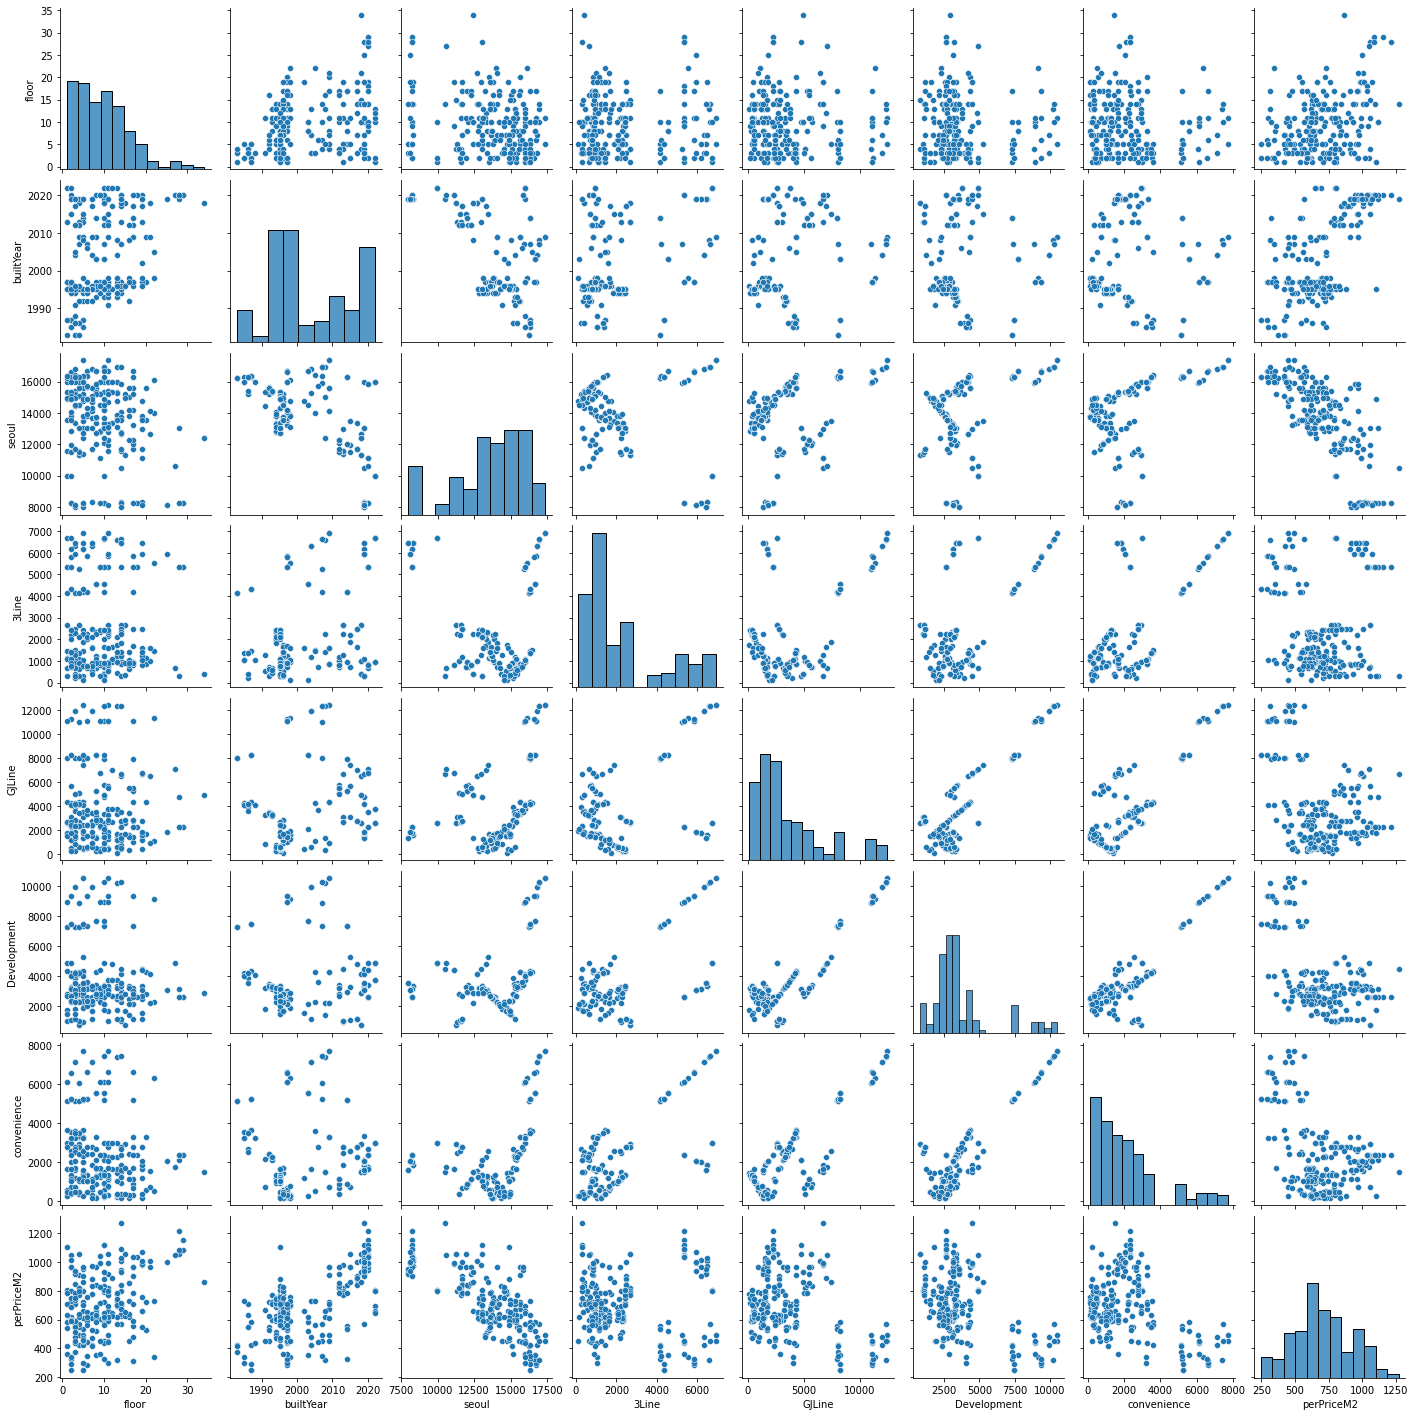

In [ ]:
# seaborn의 pairplot 으로 각 데이터의 분포와 데이터들간의 상관관계를 파악 
# 가격(MEDV)과 주택당 방수(RM) 간 강한 양의 상관관계를 가지는 것을 확인 
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[['floor','builtYear',"seoul", "3Line", "GJLine", "Development","convenience","perPriceM2"]])
plt.show()

In [ ]:
from scipy.stats.stats import pearsonr
# 상관계수와 p-value(피어슨 상관계수) 확인. 서울과의 거리와 면적당 가격 
pearsonr(df.seoul, df.perPriceM2) 

(-0.7585665537740925, 3.5481719677952077e-43)

In [ ]:
pearsonr(df.floor, df.perPriceM2) 

(0.3530480275718068, 5.627442477233972e-08)

floor 빼고 회귀분석 진행

In [ ]:
from sklearn import model_selection
dfX=df[['builtYear','seoul','3Line','GJLine','Development','convenience']] # df x에 담고
dfY=df[['perPriceM2']]  #df y에 담는다

# 학습 데이터와 시험 데이터를 80:20의 비율로 분할
x_train, x_test, y_train, y_test = model_selection.train_test_split(dfX, dfY, test_size=0.2)

In [ ]:
# 학습 데이터 179 개
print(x_train.shape, y_train.shape)
# 시험 데이터 45 개
print(x_test.shape, y_test.shape)

(179, 6) (179, 1)
(45, 6) (45, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

# 선형회귀 모델 생성
modelLR = LinearRegression()
# 선형회귀 모델 학습, 선형회귀는 하이퍼 파라미터가 존재하지 않음(b0 존재여부)
modelLR.fit(x_train, y_train)

# 학습된 회귀모형의 가중치(계수) 확인
# modelLR.intercept_ : b0(y절편), modelLR.coef_ : b1 ~ bn(각 독립변수의 가중치/기울기)
print(modelLR.intercept_, modelLR.coef_)
 
# ** 주의: 학습데이터로 이용된 데이터가 달라지면 회귀 계수도 달라질 수 있음

[-12440.38352643] [[ 7.05020694e+00 -6.58842362e-02 -4.84330366e-02  2.40984882e-03
  -3.66089492e-03  1.63332229e-02]]


> ### 모델 성능 평가
### scikit-learn의 metrics 서브패키지에는 예측 성능을 평가하기 위한 다양한 함수를 제공

> ### 회귀분석과 관련된 함수
* r2_score: 결정 계수(모형의 적합도)
* mean_absolute_error : 평균 절대 오차(mean absolute error)
* mean_squared_error: 평균 제곱 오차(mean squared error)
* Root mean squared error: 평균 제곱근 오차
* median_absolute_error: 절대 오차 중앙값(median absolute error)
  
  
> ### 회귀모형의 성능지표
* y : 실제값
* ŷ : 회귀모델의 예측값
* error =  y (실제값) - ŷ (회귀모델의 예측값)

In [ ]:
from sklearn import metrics

# 시험용 x 변수를 모형에 입력하여 y값 예측
y_predict = modelLR.predict(x_test) 
# 시험용 y변수와 모형으로 예측된 y값을 비교하여 R2 계산
rsquared = metrics.r2_score(y_test, y_predict)
print('Test R2: ', rsquared)

# 시험용 y변수와 모형으로 예측된 y값을 비교하여 MAE 계산
mae = metrics.mean_absolute_error(y_test, y_predict)
print('Test MAE: ', mae)

# 시험용 y변수와 모형으로 예측된 y값을 비교하여 MSE 계산
mse = metrics.mean_squared_error(y_test, y_predict)
print('Test MSE: ', mse)

# MSE의 제곱근을 RMSE로 계산
rmse = mse**0.5
print('Test RMSE: ', rmse)

import math
rmse = math.sqrt(mse)
print('Test RMSE: ', rmse)

Test R2:  0.6691817843619581
Test MAE:  79.43979378380027
Test MSE:  10820.968100446591
Test RMSE:  104.02388235615219
Test RMSE:  104.02388235615219


In [ ]:
# error(잔차) 계산: 실제 y값("MEDV")에서 예측 값 y를 빼서 계산  
residuals = y_test - y_predict
print(y_test.shape)
print(y_predict.shape)
print(residuals)

(45, 1)
(45, 1)
     perPriceM2
80     0.735595
129  144.941772
40    20.034236
184  -57.018183
0     -1.100497
212  -95.351892
171   57.455014
159  245.282232
31   -71.883659
115  -53.175920
24    75.360725
221   26.276614
73    77.546950
178   43.491914
102  -66.070036
120 -151.139068
190    1.582454
8     41.176944
173   -0.544986
60   -14.375604
57    18.747289
213  106.624022
87  -113.934323
104  185.056314
207  174.848732
137  -31.492588
37  -109.036756
158 -117.343134
187  -21.286044
189   40.582454
74   116.654167
116   -7.766010
91   264.567522
186  -21.286044
38  -120.036756
89   213.662481
52  -148.649078
206   91.223207
143   -1.964358
144  -13.964358
112 -152.697971
4    -54.195389
58   -24.252711
54   123.110313
79   -57.264405


#### 회귀모델의 적합도 R-squared

SST (Total sum of squares) = SSE + SSR   
 ![SST ](https://drive.google.com/uc?export=download&id=1Ds0vmkplVpqtUs0zJfCG4vQZd11phuQs)   
 
* y : 실제값
* y ̅ : 실제값들의 평균
* ŷ : 회귀모델의 예측값

- SST (Total sum of squares) : 총 변동, 실제값과 실제값 평균의 차이
- SSR (The sum of squared residuals) : 회귀모델로 설명된 변동, 회귀모델로 예측한 값과 실제값들의 평균의 차이에 대한 제곱합
- SSE (The sum of squared errors of prediction) : 회귀모델로 설명이 안된 변동, 실제값과 회귀모델로 예측한 값 차이의 제곱합
- 결정계수 (R-squared) : 총 변동에서 회귀모델로 설명된 변동의 비율, SSR/SST 또는 1 - (SSE/SST)

In [ ]:
# 적합도 검증을 위한 결정계수 R2 계산

# SST = Y와 Y의 평균의 차이를 제곱합
# "MEDV"에 저장된 실제 y값에서 numpy.mean 함수를 이용해 "MEDV"를 평균한 값을 빼고 제곱한 값을 numpy.sum함수를 이용해 더하여 산출
SST = ((y_test - y_test.mean()) ** 2).sum()

# SSE = Y와 예측된 Y의 차이를 제곱합
# residual(Y와 예측된 Y의 차이)에 저장된 잔차 값을 제곱한 값을 numpy.sum함수를 이용해 더하여 산출
SSE = (residuals**2).sum()

# R_squared = 1 - (SSE/SST), 결정계수를 구하는 식과 같이 SSE에서 SST를 나누고 1에서 빼서 산출 
R_squared = 1 - (SSE/SST)

# 출력된 결정계수 74.51%로 결과를 통해 x값이 y값을 설명하고 있는 것을 확인
print('SST = ', SST)
print('SSE = ', SSE)
print('R_squared = ', R_squared)


SST =  perPriceM2    1.471937e+06
dtype: float64
SSE =  perPriceM2    486943.56452
dtype: float64
R_squared =  perPriceM2    0.669182
dtype: float64


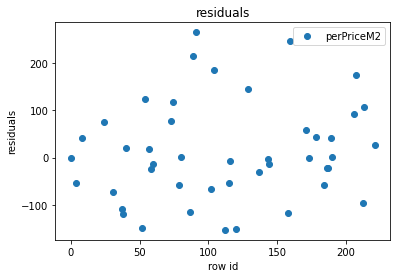

In [ ]:
# 데이터 ID(x축)별 잔차(y축)을 scatter plot
residuals.plot(style="o")
plt.title("residuals")
plt.xlabel("row id") 
plt.ylabel("residuals")
plt.show()

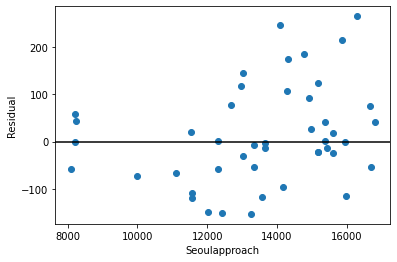

In [ ]:
# RM(x축)별 잔차(y축)을 scatter plot
plt.plot(x_test["seoul"], residuals, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("Seoulapproach")
plt.ylabel("Residual")
plt.show()

### 중복된 교통관련 변수 합하고 편의시설 빼기

* 3호선 , 경의중앙선 6:4 비중으로 합해서 'meanMetro'하나의 변수로 하고 , 
* 편의시설 상관계수 작아서 빼기

In [ ]:
df['meanMetro']=(df['3Line']*0.6+df['GJLine']*0.4)

<ipython-input-38-9afd34b9398d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['meanMetro']=(df['3Line']*0.6+df['GJLine']*0.4)


In [ ]:
from sklearn import model_selection
dfX=df[['builtYear','seoul','meanMetro','Development']] # df x에 담고
dfY=df[['perPriceM2']]  #df y에 담는다

# 학습 데이터와 시험 데이터를 80:20의 비율로 분할
x_train, x_test, y_train, y_test = model_selection.train_test_split(dfX, dfY, test_size=0.2)

# 학습 데이터 179 개
print(x_train.shape, y_train.shape)
# 시험 데이터 45 개
print(x_test.shape, y_test.shape)


(179, 4) (179, 1)
(45, 4) (45, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

# 선형회귀 모델 생성
modelLR = LinearRegression()
# 선형회귀 모델 학습, 선형회귀는 하이퍼 파라미터가 존재하지 않음(b0 존재여부)
modelLR.fit(x_train, y_train)

# 학습된 회귀모형의 가중치(계수) 확인
# modelLR.intercept_ : b0(y절편), modelLR.coef_ : b1 ~ bn(각 독립변수의 가중치/기울기)
print(modelLR.intercept_, modelLR.coef_)
 
# ** 주의: 학습데이터로 이용된 데이터가 달라지면 회귀 계수도 달라질 수 있음

[-18356.35950625] [[ 9.83318479e+00 -3.95601319e-02 -3.81199817e-02  3.89286633e-03]]


In [ ]:
from sklearn import metrics

# 시험용 x 변수를 모형에 입력하여 y값 예측
y_predict = modelLR.predict(x_test) 
# 시험용 y변수와 모형으로 예측된 y값을 비교하여 R2 계산
rsquared = metrics.r2_score(y_test, y_predict)
print('Test R2: ', rsquared)

# 시험용 y변수와 모형으로 예측된 y값을 비교하여 MAE 계산
mae = metrics.mean_absolute_error(y_test, y_predict)
print('Test MAE: ', mae)

# 시험용 y변수와 모형으로 예측된 y값을 비교하여 MSE 계산
mse = metrics.mean_squared_error(y_test, y_predict)
print('Test MSE: ', mse)

# MSE의 제곱근을 RMSE로 계산
rmse = mse**0.5
print('Test RMSE: ', rmse)

import math
rmse = math.sqrt(mse)
print('Test RMSE: ', rmse)

Test R2:  0.7748471278329441
Test MAE:  75.90059449787506
Test MSE:  8035.388681075726
Test RMSE:  89.64032954577826
Test RMSE:  89.64032954577826


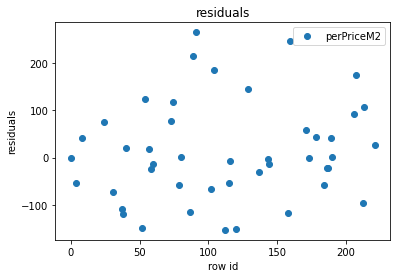

In [ ]:
# 데이터 ID(x축)별 잔차(y축)을 scatter plot
residuals.plot(style="o")
plt.title("residuals")
plt.xlabel("row id") 
plt.ylabel("residuals")
plt.show()

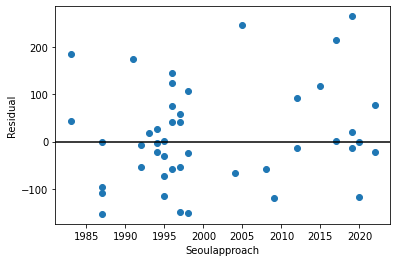

In [ ]:
# RM(x축)별 잔차(y축)을 scatter plot
plt.plot(x_test["builtYear"], residuals, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("Seoulapproach")
plt.ylabel("Residual")
plt.show()

In [ ]:
df

,streetAddress,floor,builtYear,seoul,3Line,GJLine,Development,convenience,perPriceM2,meanMetro
0,경기도 고양덕양구 읍내로 25,4,2007,15940.846835,5260.039277,10974.226930,8876.178792,6047.637585,496.0,7545.714338
1,경기도 고양덕양구 혜음로 30,22,1998,16084.331533,5533.960944,11296.339358,9172.721542,6326.556934,341.0,7838.912310
2,경기도 고양덕양구 동헌로 398-17,17,1997,16701.334903,5836.378010,11091.346582,9357.646769,6604.498618,315.0,7938.365439
3,경기도 고양덕양구 동헌로 398-17,6,1997,16701.334903,5836.378010,11091.346582,9357.646769,6604.498618,288.0,7938.365439
4,경기도 고양덕양구 동헌로 398-17,11,1997,16701.334903,5836.378010,11091.346582,9357.646769,6604.498618,302.0,7938.365439
...,...,...,...,...,...,...,...,...,...,...
219,경기도 고양덕양구 백양로 126,3,1996,14532.399046,314.491726,2299.348046,2295.458562,478.796639,750.0,1108.434254
220,경기도 고양덕양구 백양로 126,9,1996,14532.399046,314.491726,2299.348046,2295.458562,478.796639,825.0,1108.434254
221,경기도 고양덕양구 화정로 27,15,1996,14980.637687,369.167423,1693.018246,1689.129040,359.110524,657.0,898.707752
222,경기도 고양덕양구 화중로 164,6,1995,14901.566814,782.890528,2398.452030,2394.880519,1007.877613,562.0,1429.115129


In [ ]:
df.to_csv("덕양구789_최종data_meanMetro추가_영어column.csv",mode='w',index=False)

---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---